In [11]:
%load_ext autoreload
%autoreload 2

import transformer_lens

from lexical_reflections.utils.device import DEVICE

model = transformer_lens.HookedTransformer.from_pretrained("Qwen/Qwen2.5-0.5B", device=DEVICE)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loaded pretrained model Qwen/Qwen2.5-0.5B into HookedTransformer


In [12]:
from datasets import load_dataset

data_opus_books = load_dataset("Helsinki-NLP/opus_books", "en-ru", split="train").train_test_split(
    train_size=50, shuffle=True, seed=42
)

In [13]:
train_ds = data_opus_books["train"]
test_ds = data_opus_books["test"]

train_df = train_ds.to_pandas()["translation"]
test_df = test_ds.to_pandas()["translation"][:100]

In [14]:
from lexical_reflections.gather_data.activation_cache import collect_activation_cache

cache = collect_activation_cache(model, train_df)

Data len:  50


100%|██████████| 50/50 [00:13<00:00,  3.80it/s]


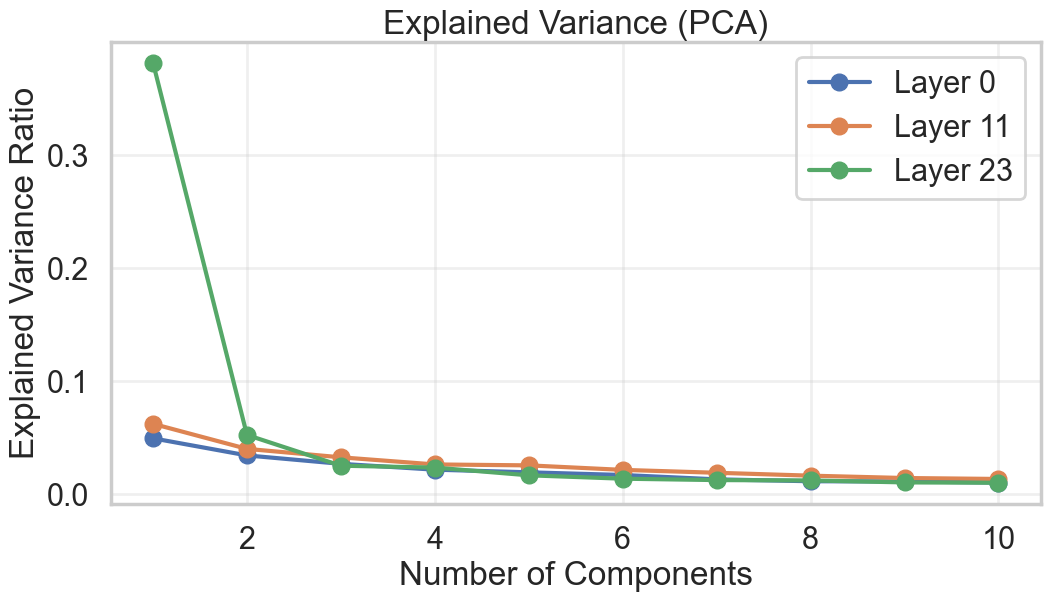

In [15]:
from lexical_reflections.pca.analyze import find_lexical_subspace_intersection

projections, hidden_space_by_language, (pca_components, pca_means, explained_variance_ratios) = (
    find_lexical_subspace_intersection(model, cache)
)

Data len:  100


100%|██████████| 100/100 [01:12<00:00,  1.37it/s]


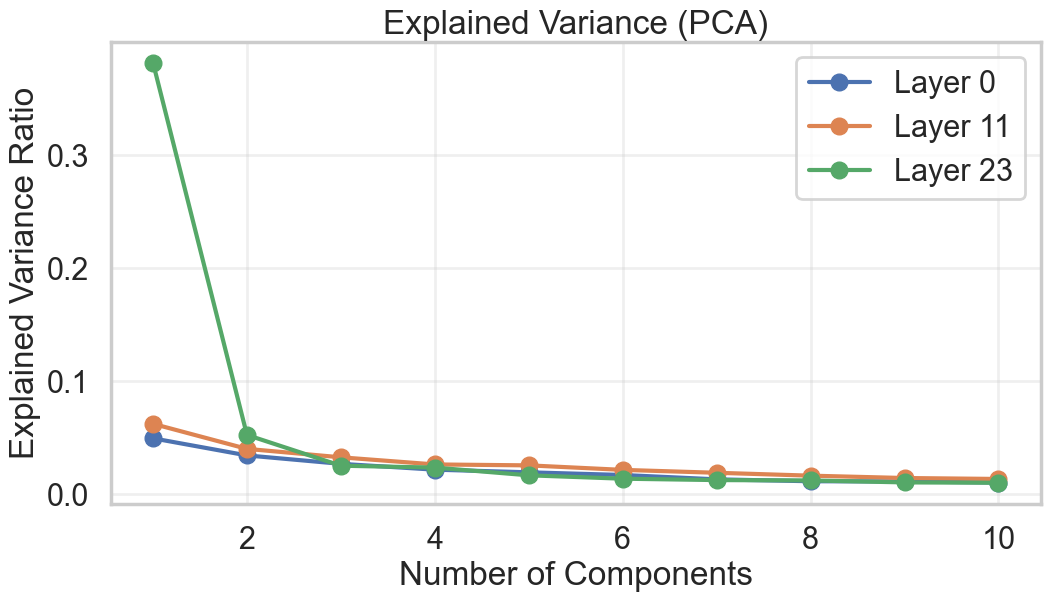

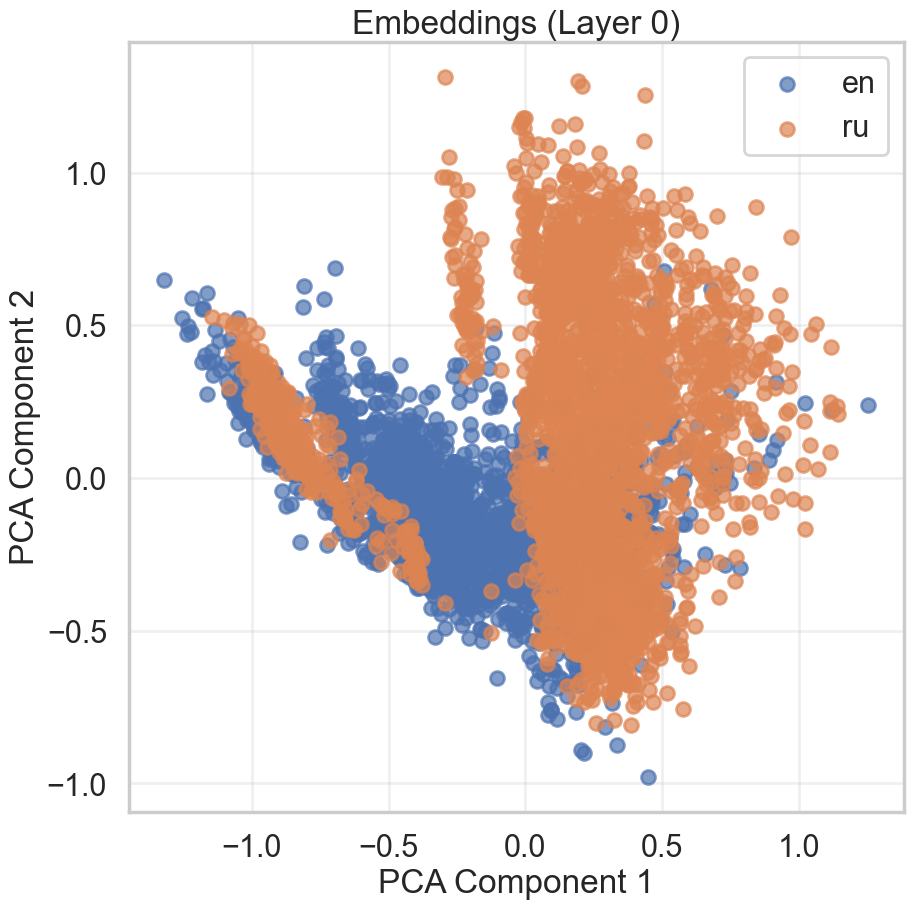

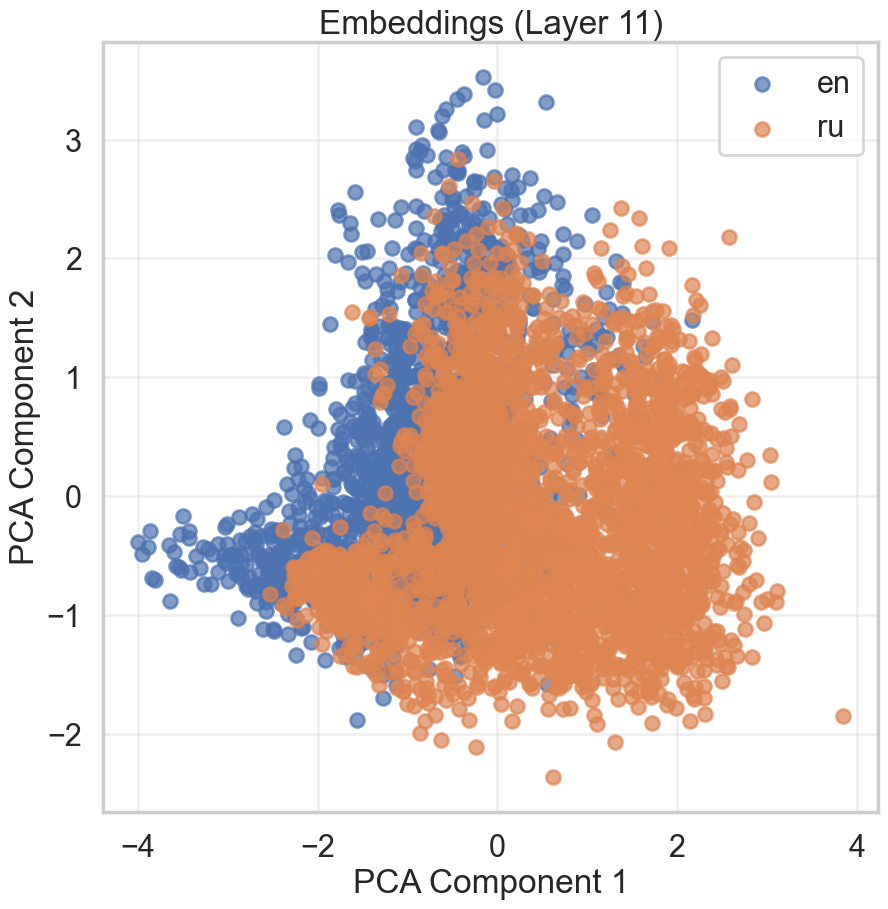

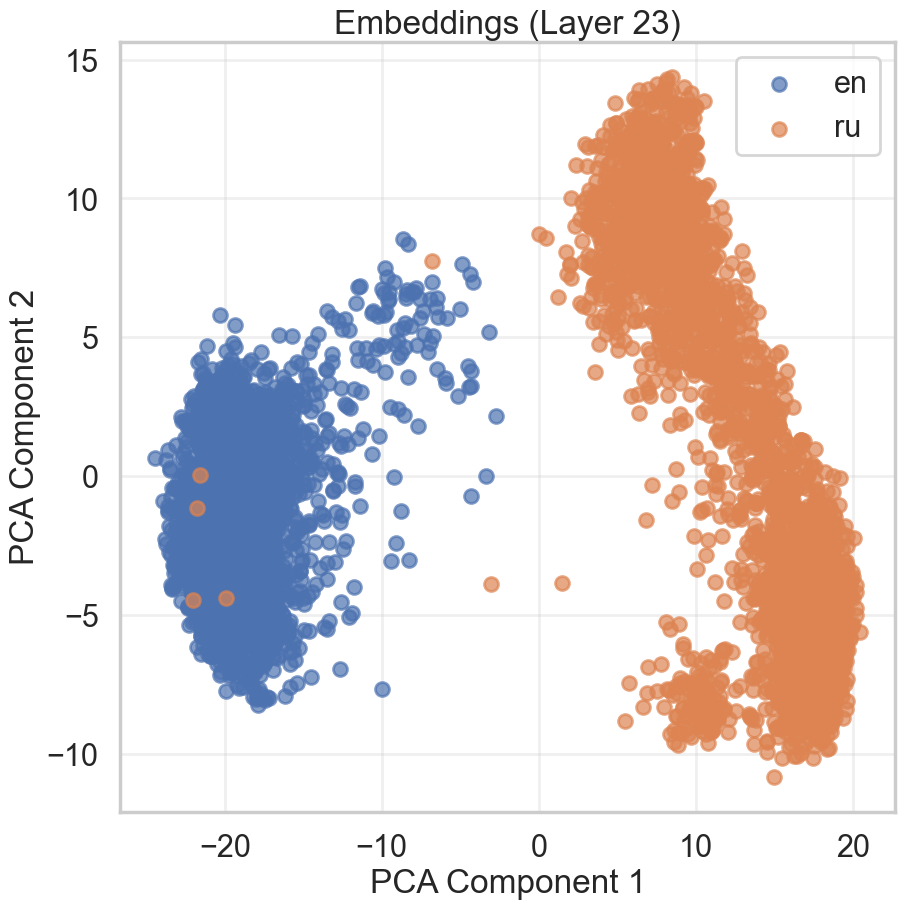

In [16]:
from lexical_reflections.gather_data.activation_cache import collect_activation_cache
from lexical_reflections.gather_data.hidden_space import collect_hidden_space_by_language
from lexical_reflections.pca.analyze import project_onto_pca
from lexical_reflections.pca.visualize import visualize_explained_variance, visualize_projections

cache = collect_activation_cache(model, test_df)
# { [lang]: np.array([d_model, n_prompts, n_layers]) }
hidden_space_by_language = collect_hidden_space_by_language(model, cache)

projections = project_onto_pca(hidden_space_by_language, pca_components, pca_means)

visualize_explained_variance(pca_components, explained_variance_ratios)
visualize_projections(hidden_space_by_language, projections)